### By Michael Le (UCID: 10104883)

In [1]:
import numpy as np  # Import NumPy
import pandas as pd # Import Pandas
import matplotlib.pyplot as plt # Matplotlib Data Visualization Library
import seaborn as sns # Seaborn Data Visualization Library

from sklearn.model_selection import train_test_split # Import Scikit-Learn train_test_split method
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn
from sklearn.metrics import mean_squared_error # Import mean_squared_error method from Scikit-Learn metrics

In [2]:
# Upload the CSV data and convert it to a Pandas DataFrame, where Community Name is the Index column
df = pd.read_csv('./reduced_version_data_ENEL_645.csv', index_col="Community Name")
df.head()

,Sector,Group Category,Category,Crime Count,Resident Count,Year,Month
Community Name,,,,,,,
WHITEHORN,NORTHEAST,Crime,Street Robbery,1,12019,2019,SEP
FOOTHILLS,EAST,Crime,Theft OF Vehicle,10,317,2019,NOV
ACADIA,SOUTH,Crime,Theft FROM Vehicle,13,10520,2019,SEP
MAHOGANY,SOUTHEAST,Crime,Theft OF Vehicle,1,11784,2019,NOV
LINCOLN PARK,WEST,Crime,Commercial Break & Enter,5,2617,2019,NOV


In [3]:
# View dimensions of the DataFrame
df.shape

(100000, 7)

In [4]:
# Check for null values
df.isnull().sum() 

Sector            0
Group Category    0
Category          0
Crime Count       0
Resident Count    0
Year              0
Month             0
dtype: int64

In [5]:
# Use get_dummies to convert categorical variables into separate indicator columns of 0s and 1s and create a new DataFrame 
# called df_dummies

df_dummies = pd.get_dummies(df, columns=['Sector', 'Group Category', 'Category', 'Month'])
df_dummies

,Crime Count,Resident Count,Year,Sector_CENTRE,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
Community Name,,,,,,,,,,,,,,,,,,,,,
WHITEHORN,1,12019,2019,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FOOTHILLS,10,317,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ACADIA,13,10520,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
MAHOGANY,1,11784,2019,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
LINCOLN PARK,5,2617,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODBINE,2,9131,2013,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
NORTH GLENMORE PARK,2,2333,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
HAYSBORO,5,6943,2012,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# View columns in df_dummies to ensure no columns are missing
list(df_dummies.columns)

['Crime Count',
 'Resident Count',
 'Year',
 'Sector_CENTRE',
 'Sector_EAST',
 'Sector_NORTH',
 'Sector_NORTHEAST',
 'Sector_NORTHWEST',
 'Sector_SOUTH',
 'Sector_SOUTHEAST',
 'Sector_WEST',
 'Group Category_Crime',
 'Group Category_Disorder',
 'Category_1320.131',
 'Category_Assault (Non-domestic)',
 'Category_Commercial Break & Enter',
 'Category_Commercial Robbery',
 'Category_Physical Disorder',
 'Category_Residential Break & Enter',
 'Category_Social Disorder',
 'Category_Street Robbery',
 'Category_Theft FROM Vehicle',
 'Category_Theft OF Vehicle',
 'Category_Violence Other (Non-domestic)',
 'Month_APR',
 'Month_AUG',
 'Month_DEC',
 'Month_FEB',
 'Month_JAN',
 'Month_JUL',
 'Month_JUN',
 'Month_MAR',
 'Month_MAY',
 'Month_NOV',
 'Month_OCT',
 'Month_SEP']

In [7]:
# Create Features Matrix X
X = df_dummies[df_dummies.columns[1:]]
# Create output vector y, which is the Crime Count column in df_dummies
y = df_dummies[['Crime Count']]
# Split arrays or matrices into random train and test subsets. Use 70/30 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=956)

In [8]:
pd.set_option('display.max_columns', None) # Set pandas option to view all columns
X.head() # View preview of Features Matrix X

,Resident Count,Year,Sector_CENTRE,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,Group Category_Crime,Group Category_Disorder,Category_1320.131,Category_Assault (Non-domestic),Category_Commercial Break & Enter,Category_Commercial Robbery,Category_Physical Disorder,Category_Residential Break & Enter,Category_Social Disorder,Category_Street Robbery,Category_Theft FROM Vehicle,Category_Theft OF Vehicle,Category_Violence Other (Non-domestic),Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
Community Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WHITEHORN,12019,2019,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
FOOTHILLS,317,2019,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
ACADIA,10520,2019,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
MAHOGANY,11784,2019,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
LINCOLN PARK,2617,2019,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
# View dimensions of the Features Matrix X and Output Column y for both training and testing sets
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Dimensions of y_test: {y_test.shape}")

Dimensions of X_train: (70000, 35)
Dimensions of X_test: (30000, 35)
Dimensions of y_train: (70000, 1)
Dimensions of y_test: (30000, 1)


### Algorithm Description
In the code block below, I am instantiating a Linear Regression model. I have decided to keep all features (except for Community Name which is now the index) and apply one hot encoding with the get_dummies() method from pandas for feature engineering, in order to convert categorical data variables like Sector, Group Category, Category, and Month so they can be used in my model to improve predictions. I fit the Linear Regression model to the training data, which is 70% of the total data because this was arbitrarily chosen in the assignment description. Once the model is trained, I use the newly-trained model to predict Crime Count values of the remaining 30% of the total data (the testing data).

Once the prediction is calculated, I print the coefficients of the model. I also calculate and print the mean-squared error using the true crime count values in the testing set, compared to the predicted values.

In [10]:
# Instantiate Linear Regression model
model = LinearRegression()
# Train the Linear Regression model using training data
model.fit(X_train, y_train)
# Use trained model to predict output values if the test features matrix is used
y_test_pred = model.predict(X_test)

# The coefficients of the model
print("Coefficients: \n", model.coef_ , "\n")

# Use the true labels and predicted labels for the testing set to determine mean squared error
testing_mse = mean_squared_error(y_test, y_test_pred) 
print(f"Mean Squared Error (Testing Data): {testing_mse}")

Coefficients: 
 [[ 1.27462461e-03  1.66590719e-01  8.02310257e+00  5.19782056e+00
  -4.78167451e+00  2.11668498e+00 -3.04716997e+00 -1.17893759e+00
  -4.03290202e+00 -2.29692401e+00 -5.83122755e+00  5.83122755e+00
   5.70222221e+00 -1.26001348e+00  2.10449371e-02 -3.58450255e+00
  -1.07814876e+01 -1.32054326e+00  1.66127152e+01 -4.74446878e+00
   2.23220877e+00 -3.21592224e-01 -2.55558317e+00  7.68837489e-02
   1.28170945e+00 -1.02278350e+00 -1.35684657e+00 -9.18496533e-01
   1.32154061e+00  3.62264863e-01 -4.78105958e-01  9.73812097e-01
  -6.16716639e-01  1.79209480e-01  1.97528961e-01]] 

Mean Squared Error (Testing Data): 453.7163551010564


### Analysis

The performance of my model is evaluated based on mean-squared-error cost function, which is equal to 453.71635510105625. This is expected because we are using a real-world dataset from Open Calgary. The data in a Community Crime and Disorder Statistics dataset is likely complex enough that applying a linear regression model to it will not accurately capture and predict the number of crimes in each community center.

### Screenshot: Results
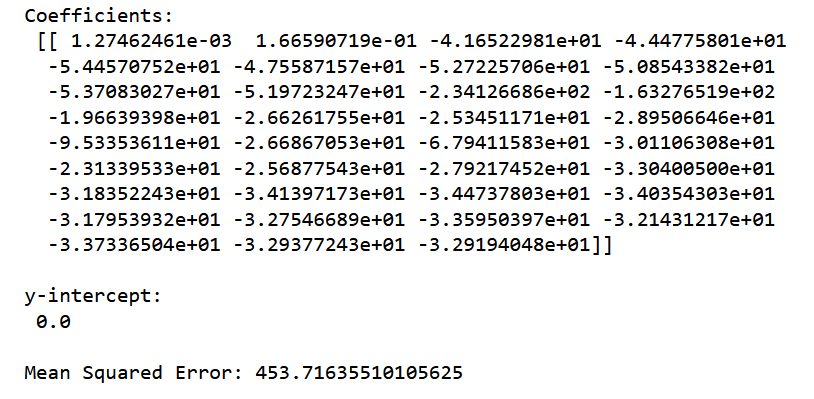

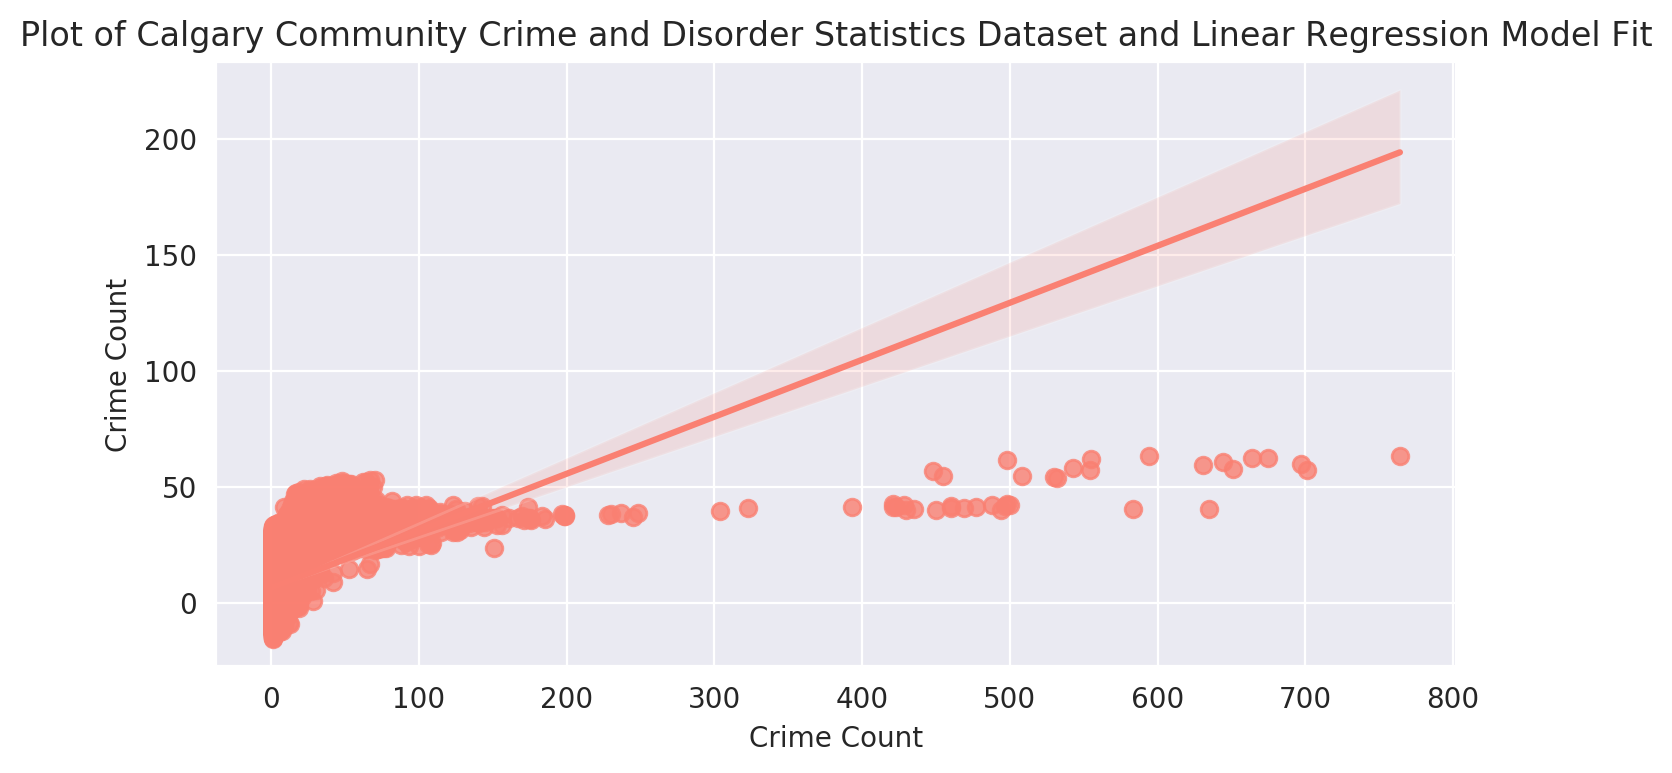

In [11]:
# Plot Test Output Vector and Predictions
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(x=y_test, y=y_test_pred, color="salmon")
  ax.set(title="Plot of Calgary Community Crime and Disorder Statistics Dataset and Linear Regression Model Fit") 
plt.xlabel('Crime Count')
plt.ylabel('Crime Count');